# **Analizando la Satisfacción de Clientes en la Industria Hotelera**

[Link al Dataset](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand)

Limpiar y explorar un dataset que contiene información sobre la satisfacción de los clientes en la industria hotelera. Este análisis es crucial para los ejecutivos de la empresa que buscan entender mejor las opiniones y experiencias de sus clientes para mejorar los servicios ofrecidos.

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#cargar
df = pd.read_csv('hotel_bookings.csv')

**Exploración Inicial de los Datos**

In [38]:
#ver dataset
df.head(5)

df.tail(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [39]:
#Verificación y ajuste de tipos de datos:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [40]:
#esumen estadístico del dataset, incluyendo medidas de tendencia central y dispersión para las variables numéricas.
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


**Limpieza de datos**

In [41]:
#Detección y eliminación de valores duplicados, muy importante porque los duplicados pueden distorsionar el análisis.
print(df.duplicated().sum())
  #111304 filas totales

31994


In [42]:
df = df.drop_duplicates()
  #la tabla ahora posee 80645 filas

In [43]:
df = pd.read_csv('hotel_bookings.csv', dtype =  {
    "hotel": "category",
    "is_canceled": "boolean",
    "lead_time": "int16",
    "arrival_date_year": "int16",
    "arrival_date_month": "category",
    "arrival_date_week_number": "int8",
    "arrival_date_day_of_month": "int8",
    "stays_in_weekend_nights": "int8",
    "stays_in_week_nights": "int8",
    "adults": "int8",
    "children": "Int32",
    "babies": "int8",
    "meal": "category",
    "country": "category",
    "market_segment": "category",
    "distribution_channel": "category",
    "is_repeated_guest": "boolean",
    "previous_cancellations": "int8",
    "previous_bookings_not_canceled": "int8",
    "reserved_room_type": "category",
    "assigned_room_type": "category",
    "booking_changes": "int8",
    "deposit_type": "category",
    "agent": "Int32",
    "company": "Int32",
    "days_in_waiting_list": "int16",
    "customer_type": "category",
    "adr": "float32",
    "required_car_parking_spaces": "int8",
    "total_of_special_requests": "int8",
    "reservation_status": "category"
})

df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"])

#Agregar columna de año y mes
df['year_month'] = df['reservation_status_date'].dt.to_period('M')

df.info()

#con estas conversiones a tipos de datos mas adecuados, el uso de memoria fue optimizado
#Antes: memory usage: 20.3 MB
#Ahora: memory usage: 6.8 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  category      
 1   is_canceled                     119390 non-null  boolean       
 2   lead_time                       119390 non-null  int16         
 3   arrival_date_year               119390 non-null  int16         
 4   arrival_date_month              119390 non-null  category      
 5   arrival_date_week_number        119390 non-null  int8          
 6   arrival_date_day_of_month       119390 non-null  int8          
 7   stays_in_weekend_nights         119390 non-null  int8          
 8   stays_in_week_nights            119390 non-null  int8          
 9   adults                          119390 non-null  int8          
 10  children                        119386 non-null  Int32  

In [44]:
#Consistencia en valores categóricos:
#Elegi convertir todos los valores que denomine como 'Categoricos' a Numpy Arrays para una visualizacion
#de errores mas sencilla, en caso de que los hayan

print(np.array(df['hotel'].unique()))
print('\n')

print(np.array(df['arrival_date_month'].unique()))
print('\n')

print(np.array(df['deposit_type'].unique()))
print('\n')

print(np.array(df['meal'].unique()))
print('\n')

print(np.array(df['country'].unique()))
print('\n')

print(np.array(df['market_segment'].unique()))
print('\n')

print(np.array(df['distribution_channel'].unique()))
print('\n')

print(np.array(df['reserved_room_type'].unique()))
print('\n')

print(np.array(df['assigned_room_type'].unique()))
print('\n')

print(np.array(df['customer_type'].unique()))
print('\n')

print(np.array(df['reservation_status'].unique()))
print('\n')

['Resort Hotel' 'City Hotel']


['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']


['No Deposit' 'Refundable' 'Non Refund']


['BB' 'FB' 'HB' 'SC' 'Undefined']


['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA

In [45]:
#Correccion:
#Varias columnas contenian valores 'Undefined', decidi corregirlas basandome en la informacion (que adjunte) del DataSet proporcionada
#en la pagina de Kaggle

#Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal
df['meal'] = df['meal'].replace(['Undefined', 'SC'], 'No Meal')

#Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
df['market_segment'] = df['market_segment'].replace(['Undefined'], ' ')

#Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
df['distribution_channel'] = df['distribution_channel'].replace(['Undefined'], ' ')

<ipython-input-45-c77d8cf8b761>:6: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['meal'] = df['meal'].replace(['Undefined', 'SC'], 'No Meal')
<ipython-input-45-c77d8cf8b761>:9: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['market_segment'] = df['market_segment'].replace(['Undefined'], ' ')
<ipython-input-45-c77d8cf8b761>:12: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rena

In [46]:
#Manejo de valores faltantes
df.columns[df.isnull().any()]   #Index(['children', 'country', 'agent', 'company'], dtype='object')

null = df[['children', 'country', 'agent', 'company']].isnull().sum()
print(null)

children         4
country        488
agent        16340
company     112593
dtype: int64


In [47]:
#Correccion:

#Number of children
df['children'] = df['children'].fillna(0)

#Country of origin. Categories are represented in the ISO 3155–3:2013 format
df['country'] = df['country'].cat.add_categories('Unknown') #primero agregar la categoria Unknown, ya que es una columna tipo Categorico
df['country'] = df['country'].fillna('Unknown')

#ID of the travel agency that made the booking
df['agent'] = df['agent'].fillna(-1) #ya que la columna es de tipo INT, el valor '-1' significaria lo mismo que 'UNKNOWN'

#ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
df['company'] = df['company'].fillna(-1)


#comprobar exito
null = df[['children', 'country', 'agent', 'company']].isnull().sum()
print(null)

children    0
country     0
agent       0
company     0
dtype: int64


In [48]:
#Detección de datos anómalos: por ejemplo, estancias mayores a 30 noches

#cree una columna nueva para calcular el total de noches que el huesped se hospedo en el hotel
df['Total_Stays'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

print(df[df['Total_Stays'] > 100])

#No existe algun valor que se pueda considerar anomalo

Empty DataFrame
Columns: [hotel, is_canceled, lead_time, arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, meal, country, market_segment, distribution_channel, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, reserved_room_type, assigned_room_type, booking_changes, deposit_type, agent, company, days_in_waiting_list, customer_type, adr, required_car_parking_spaces, total_of_special_requests, reservation_status, reservation_status_date, year_month, Total_Stays]
Index: []

[0 rows x 34 columns]


**Análisis estadístico descriptivo basico**

In [49]:
variables_clave = ['adr', 'lead_time', 'stays_in_week_nights']
df[variables_clave].describe()

,adr,lead_time,stays_in_week_nights
count,119390.000000,119390.000000,119390.000000
mean,101.831123,104.011416,2.500302
std,50.533749,106.863097,1.908286
min,-6.380000,0.000000,0.000000
25%,69.290001,18.000000,1.000000
50%,94.574997,69.000000,2.000000
75%,126.000000,160.000000,3.000000
max,5400.000000,737.000000,50.000000


In [50]:
cancelaciones = df['is_canceled'].value_counts(normalize=True)
print("Proporción de reservas canceladas:")
print(cancelaciones)

Proporción de reservas canceladas:
is_canceled
False    0.629584
True     0.370416
Name: proportion, dtype: Float64


**Visualización de Resultados**

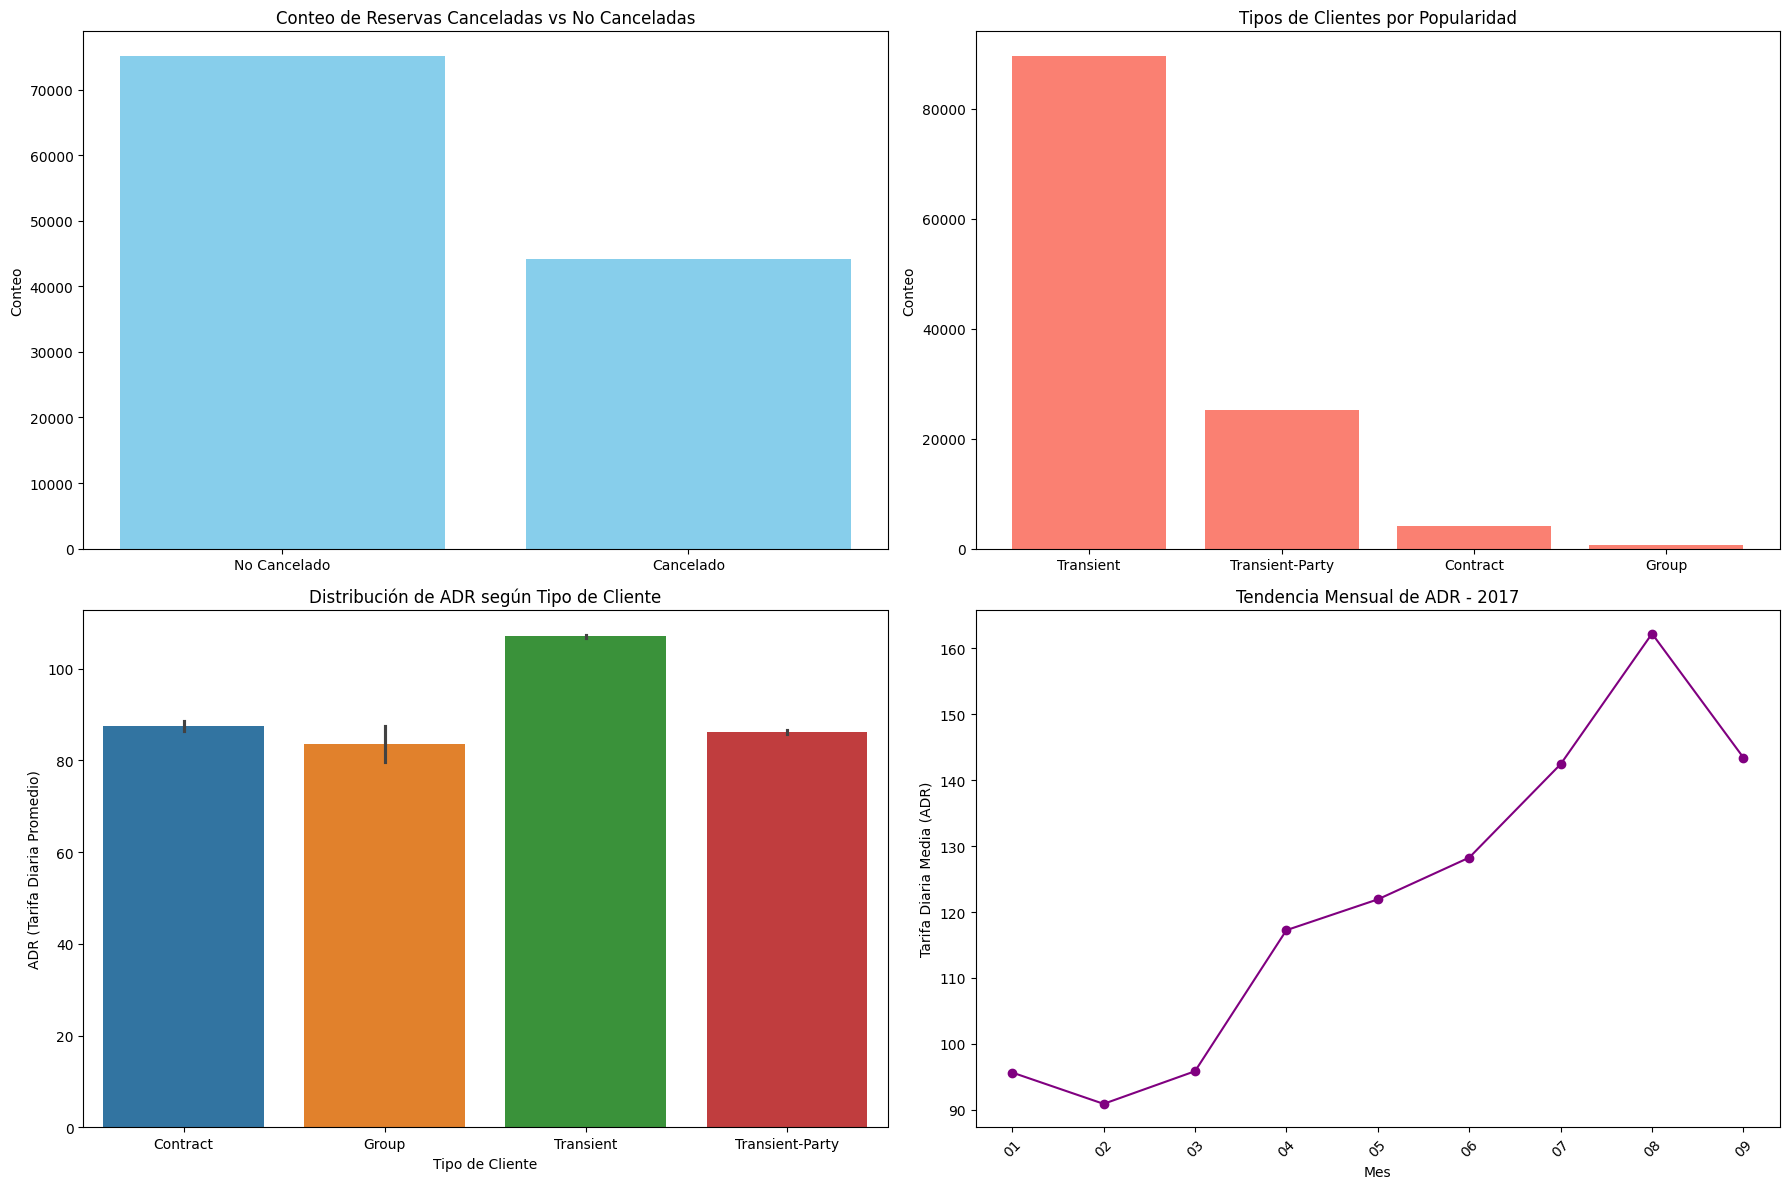

In [51]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))

tipo_cliente = df['customer_type'].value_counts()
cancelado = df['is_canceled'].value_counts()

#Conteo de Reservas Canceladas vs No Canceladas
axes[0, 0].bar(cancelado.index.astype(str), cancelado.values, color='skyblue')
axes[0, 0].set_title('Conteo de Reservas Canceladas vs No Canceladas')
axes[0, 0].set_ylabel('Conteo')
axes[0, 0].set_xticks([0, 1])
axes[0, 0].set_xticklabels(['No Cancelado', 'Cancelado'])
#La mayoría de las reservas no fueron canceladas.

#Tipos de Clientes por Popularidad
axes[0, 1].bar(tipo_cliente.index.astype(str), tipo_cliente.values, color='salmon')
axes[0, 1].set_title('Tipos de Clientes por Popularidad')
axes[0, 1].set_ylabel('Conteo')
#El tipo de cliente "Transient" es el más popular.

#Distribución de ADR según Tipo de Cliente
sns.barplot(x='customer_type', y='adr', data=df, ax=axes[1, 0], hue='customer_type')
axes[1, 0].set_title('Distribución de ADR según Tipo de Cliente')
axes[1, 0].set_xlabel('Tipo de Cliente')
axes[1, 0].set_ylabel('ADR (Tarifa Diaria Promedio)')

#Tendencia Mensual de ADR
ano_reciente = df['year_month'].max().year
adr_mensual_ano_reciente = df[df['year_month'].dt.year == este_ano].groupby('year_month')['adr'].mean()

axes[1, 1].plot(adr_mensual_ano_reciente.index.strftime('%m'), adr_mensual_ano_reciente.values, marker='o', color='purple')
axes[1, 1].set_title(f'Tendencia Mensual de ADR - {ano_reciente}')
axes[1, 1].set_xlabel('Mes')
axes[1, 1].set_ylabel('Tarifa Diaria Media (ADR)')
axes[1, 1].tick_params(axis='x', rotation=45)

# Ajustar diseño y mostrar
plt.tight_layout()
plt.show()


<ipython-input-52-f846348ceb00>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hotel_deposito = df.groupby(['hotel', 'deposit_type']).size().unstack(fill_value=0)


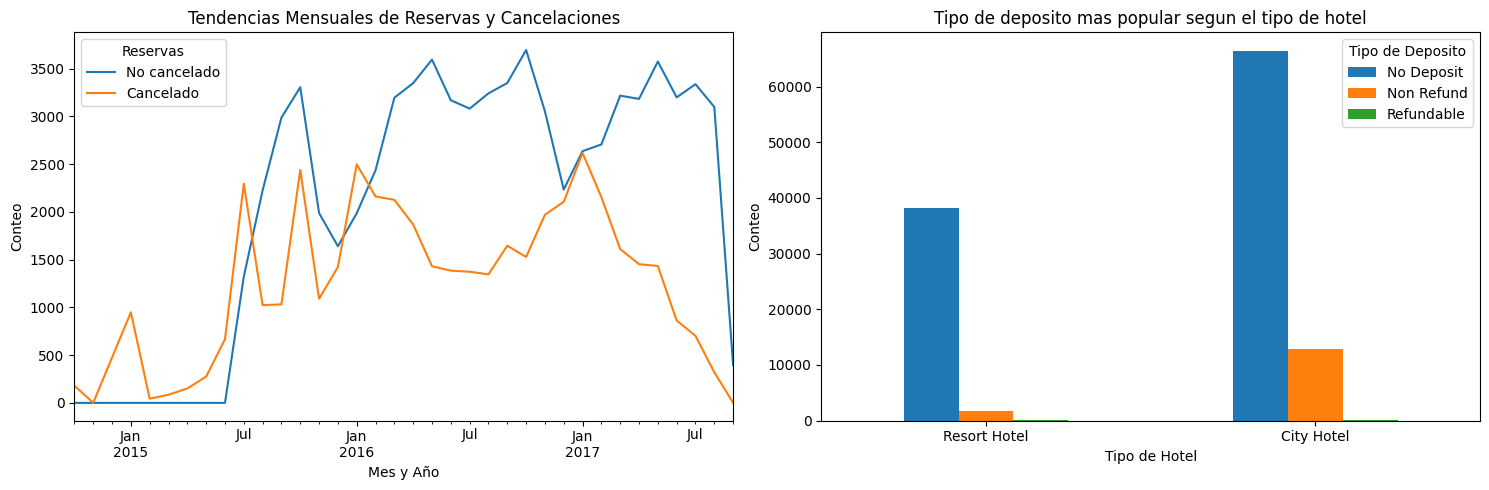

In [52]:
#Visualizaciones exploratorias multivariadas:
fig, axes = plt.subplots(ncols=2, figsize=(15,5))

#primer grafico
df['month'] = df['reservation_status_date'].dt.to_period('M')
sumario_meses = df.groupby(['month', 'is_canceled']).size().unstack(fill_value=0)
sumario_meses.plot(kind='line', ax=axes[0])
axes[0].set_title('Tendencias Mensuales de Reservas y Cancelaciones')
axes[0].set_ylabel('Conteo')
axes[0].set_xlabel('Mes y Año')
axes[0].legend(title='Reservas', labels=['No cancelado', 'Cancelado'])

#segundo grafico
hotel_deposito = df.groupby(['hotel', 'deposit_type']).size().unstack(fill_value=0)
hotel_deposito.plot(kind='bar', ax=axes[1])
axes[1].set_title('Tipo de deposito mas popular segun el tipo de hotel')
axes[1].set_ylabel('Conteo')
axes[1].set_xlabel('Tipo de Hotel')
axes[1].legend(title='Tipo de Deposito')
plt.xticks(rotation=0)
#Se observa que en ambos tipos de hoteles, la gran mayoria de clientes no dejo un deposito previo

#Analisis estadístico descriptivo
variables_clave = ['adr', 'lead_time', 'stays_in_week_nights']
df[variables_clave].describe()

plt.tight_layout()
plt.show()

# **Identificación de tendencias:**

**Tendencias de Cancelación:**

Al analizar los datos de los gráficos, podemos ver tendencias importantes en la cancelación de reservas. En el gráfico lineal "Tendencias Mensuales de Reservas y Cancelaciones", especialmente a mediados de año, hay un aumento en las cancelaciones. Esto podría indicar tendencias estacionales o factores externos que afectan las cancelaciones en esos momentos. En el gráfico de barras "Conteo de Reservas Canceladas vs No Canceladas", vemos que la mayoría de los clientes cumplen con sus reservas.

**Perfil de Clientes:**

En el gráfico "Tipos de clientes por popularidad", la mayoría son del segmento "transitorio", lo que sugiere que la mayor parte de los clientes son viajeros individuales, mientras que las reservas "grupales" son menos comunes. Esto da información sobre la composición de clientes según el tipo de reservas.

**Política de Depósitos por Tipo de Hotel:**

En el gráfico de tipos de depósitos, la opción "Sin depósito" es común tanto en hoteles urbanos como turísticos. Pero los depósitos no reembolsables son más comunes en hoteles urbanos, lo que indica políticas de cancelación más estrictas en los hoteles urbanos.

**Tendencias Mensuales:**

Al examinar las tendencias mensuales, vemos un patrón cíclico en las reservas a lo largo de los años. Hay picos en ciertos meses, probablemente en verano o vacaciones, reflejando una mayor demanda en esos momentos.
Estas tendencias destacan aspectos importantes que los directores de hoteles deberían considerar al establecer precios, implementar estrategias de marketing y gestionar inventarios, especialmente cuando hay alta demanda y riesgo de cancelaciones. Si le interesa un análisis más detallado de esta información, por favor infórmenos.

